In [2]:
import numpy as np
import matplotlib.pyplot as plt
from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(114514)

# 多项式曲线拟合

- 生成训练数据

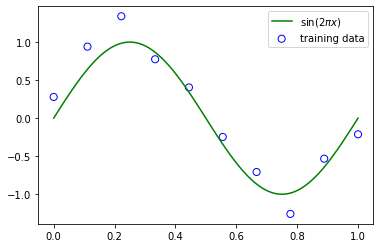

In [3]:
def create_train_data_01(func, sample_size, std):
    # [0,1]范围内生成均匀分布样本，添加高斯噪声
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_train_data_01(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolors="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

- 不同系数的多项式拟合效果

[0.07787926]
[ 0.97270072 -1.78964294]
[  0.27837124   9.77539285 -30.63212067  20.48320791]
[ 2.78727251e-01 -8.74137432e+01  2.11788926e+03 -1.85516536e+04
  8.44029520e+04 -2.24489173e+05  3.61967824e+05 -3.48276651e+05
  1.83876133e+05 -4.09603979e+04]


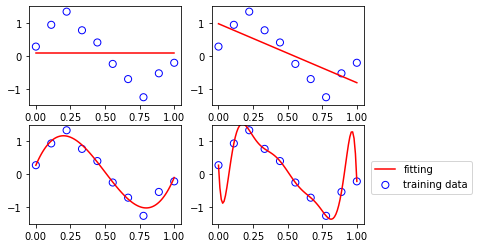

In [5]:
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i+1)
    #将记录的各项特征组合为多项式特征
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    #Tip：此处的线性回归是解析解
    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    #输出模型参数
    print(model.w)

    plt.scatter(x_train, y_train, facecolor="none", edgecolors="b", s=50, label="training data")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))

plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

- 均方根误差函数

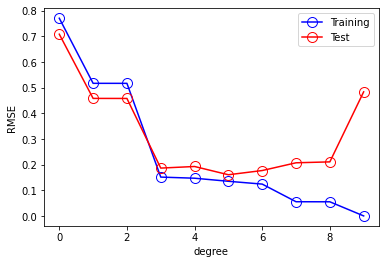

In [7]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(y,y_test))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

- 正则化惩罚

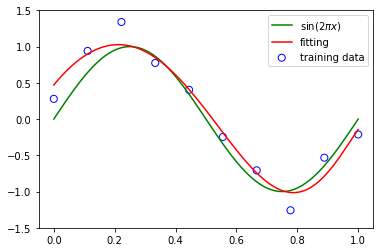

In [8]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

#Tip：解析解，添加了alpha作为惩罚系数
model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.show()

## 拓展

- 过高的正则化惩罚

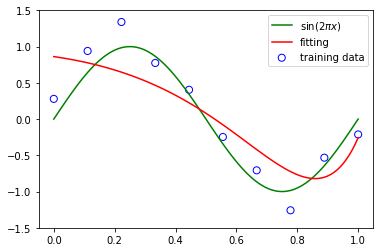

In [10]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-1)
model.fit(X_train, y_train)
y = model.predict(X_test)

y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.show()

- 增加采样减轻过拟合

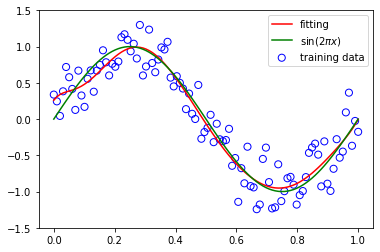

In [23]:
def create_train_data_02(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_train_data_02(func, 100, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = LinearRegression()
model.fit(X_train, y_train)
y = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolors="b", s=50, label="training data")
plt.plot(x_test, y, c="r", label="fitting")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

- 拟合tan函数

tan函数会在区间边界趋向无穷大，进而导致过拟合。目前的解决办法是在区间边界添加一个量，将区间缩小。

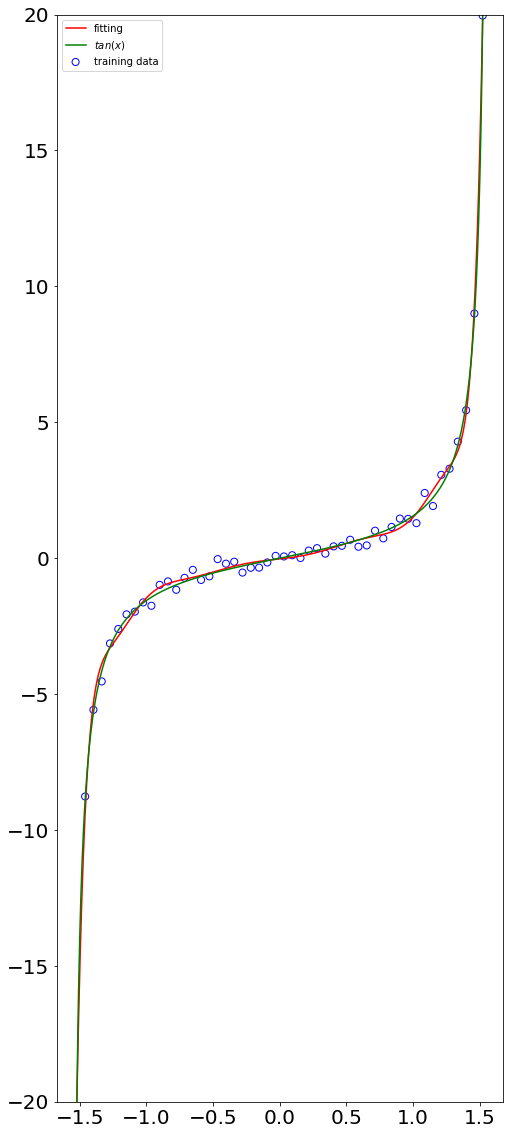

In [94]:
def create_train_data_03(func, sample_size, std):
    x = np.linspace(-np.pi/2+0.05, np.pi/2-0.05, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.tan(x)

x_train, y_train = create_train_data_03(func, 50, 0.25)
x_test = np.linspace(-np.pi/2+0.05, np.pi/2-0.05, 1000)
y_test = func(x_test)

feature = PolynomialFeature(13)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolors="b", s=50, label="training data")
plt.plot(x_test, y, c="r", label="fitting")
plt.plot(x_test, y_test, c="g", label="$tan(x)$")
plt.ylim(-20, 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams['figure.figsize'] = (8.0, 20.0)
plt.legend()
plt.show()